In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2]
y = y[y<2]

In [4]:
X.shape

(100, 2)

In [7]:
y.shape

(100,)

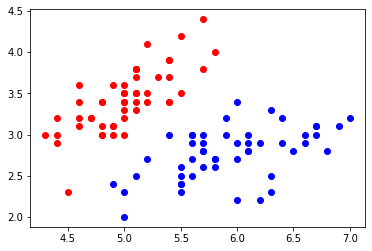

In [8]:
plt.scatter(X[y==0,0], X[y==0,1],color = 'red')
plt.scatter(X[y==1,0], X[y==1,1],color = 'blue')
plt.show()

### 使用逻辑回归

In [12]:
from ML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [13]:
from ML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

In [15]:
log_reg.score(X_test, y_test)

1.0

In [17]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [19]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

### 决策边界

In [20]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_)/log_reg.coef_[1]

In [22]:
x1_plot = np.linspace(4 ,8 ,1000)
x2_plot = x2(x1_plot)

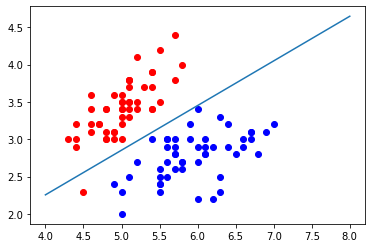

In [25]:
plt.scatter(X[y==0,0], X[y==0,1],color = 'red')
plt.scatter(X[y==1,0], X[y==1,1],color = 'blue')
plt.plot(x1_plot,x2_plot)
plt.show()

In [35]:
def plot_decision_boundary(model, axis):
    
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

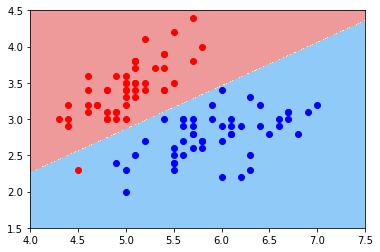

In [36]:
plot_decision_boundary(log_reg, axis = [4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1],color = 'red')
plt.scatter(X[y==1,0], X[y==1,1],color = 'blue')
plt.show()

In [34]:
plt.contourf?

### kNN的决策边界

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
knn_clf.score(X_test,y_test)

1.0

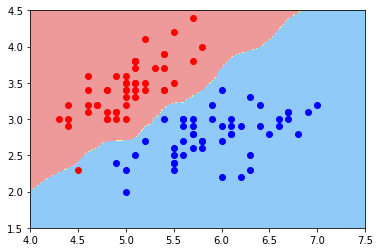

In [37]:
plot_decision_boundary(knn_clf, axis = [4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1],color = 'red')
plt.scatter(X[y==1,0], X[y==1,1],color = 'blue')
plt.show()

In [40]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier()

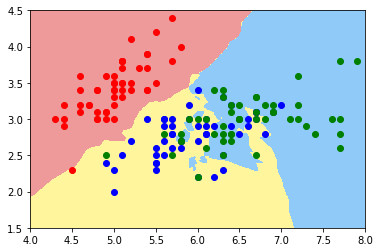

In [42]:
plot_decision_boundary(knn_clf_all, axis = [4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1],color = 'red')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1],color = 'blue')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1],color = 'green')
plt.show()

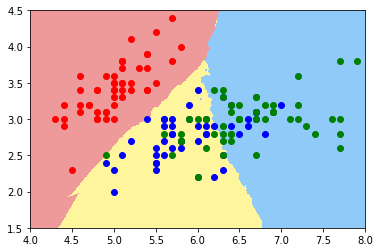

In [43]:
knn_clf_all = KNeighborsClassifier(50)#k越大，模型越简单，不会出现过拟合
knn_clf_all.fit(iris.data[:,:2],iris.target)
plot_decision_boundary(knn_clf_all, axis = [4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1],color = 'red')
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1],color = 'blue')
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1],color = 'green')
plt.show()